## Exercício - 8

28/05/2021
Renato Banzai - n. USP 3683321

1 - Faça um programa que leia uma imagem contendo uma reta e imprima as palavras “vertical”,
“horizontal” ou “inclinada”, dependendo do posicionamento da reta. O fundo da imagem
sempre é branco e as retas sempre estarão desenhadas na cor preta. A interface de entrada é
livre.

In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import math

def horizontal_mask(image_matrix):
    result = 0
    lines = len(image_matrix)
    columns = len(image_matrix[0])
    line_end = lines - 3
    column_end = columns -3
    # Run each pixel of the image matrix
    for line in range(0, line_end, 3):
        for column in range(0, column_end, 3):
            result += image_matrix[line][column] * -1
            result += image_matrix[line][column + 1] * -1
            result += image_matrix[line][column + 2] * -1
            result += image_matrix[line + 1][column] * 2
            result += image_matrix[line + 1][column + 1] * 2
            result += image_matrix[line + 1][column + 2] * 2
            result += image_matrix[line + 2][column] * -1
            result += image_matrix[line + 2][column + 1] * -1
            result += image_matrix[line + 2][column + 2] * -1
    #print(self._image_location, "horizontal mask", result)
    return abs(result)

def vertical_mask(image_matrix):
    result = 0
    lines = len(image_matrix)
    columns = len(image_matrix[0])
    line_end = lines - 3
    column_end = columns -3
    # Run each pixel of the image matrix
    for line in range(0,line_end,3):
        for column in range(0,column_end,3):
            result += image_matrix[line][column] * -1
            result += image_matrix[line][column + 1] * 2
            result += image_matrix[line][column + 2] * -1
            result += image_matrix[line + 1][column] * -1
            result += image_matrix[line + 1][column + 1] * 2
            result += image_matrix[line + 1][column + 2] * -1
            result += image_matrix[line + 2][column] * -1
            result += image_matrix[line + 2][column + 1] * 2
            result += image_matrix[line + 2][column + 2] * -1
    #print(self._image_location, "vertical mask", result)
    return abs(result)

def diagonal_mask(image_matrix):
    result = 0
    lines = len(image_matrix)
    columns = len(image_matrix[0])
    line_end = lines - 3
    column_end = columns -3
    # Run each pixel of the image matrix
    for line in range(0,line_end,3):
        for column in range(0,column_end,3):
            result += image_matrix[line][column] * 2
            result += image_matrix[line][column + 1] * -1
            result += image_matrix[line][column + 2] * -1
            result += image_matrix[line + 1][column] * -1
            result += image_matrix[line + 1][column + 1] * 2
            result += image_matrix[line + 1][column + 2] * -1
            result += image_matrix[line + 2][column] * -1
            result += image_matrix[line + 2][column + 1] * -1
            result += image_matrix[line + 2][column + 2] * 2
    #print(self._image_location, "diagonal mask", result)
    return abs(result)

def print_line_type(image_matrix):
    abs_horizontal_mask = horizontal_mask(image_matrix)
    abs_vertical_mask = vertical_mask(image_matrix)
    abs_diagonal_mask = diagonal_mask(image_matrix)

    if abs_horizontal_mask > abs_vertical_mask:
        if abs_diagonal_mask > abs_horizontal_mask:
            result = "diagonal"
        else:
            result = "horizontal"
    else:
        if abs_diagonal_mask > abs_vertical_mask:
            result = "diagonal"
        else:
            result = "vertical"
            
    print(result)
    return result

horizontal


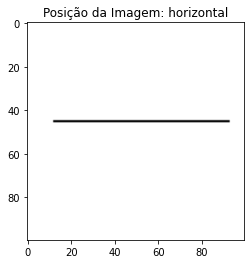

In [2]:
# Imagem Horizontal
img = cv2.imread("horizontal.bmp", 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#Exibindo o resultado do método print_line_type no título da imagem
plt.title("Posição da Imagem: " + print_line_type(img))
plt.show()
plt.close()

vertical


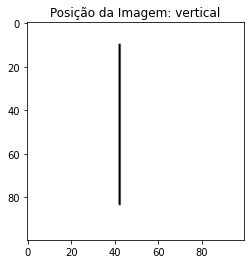

In [3]:
# Imagem Vertical
img = cv2.imread("vertical.bmp", 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#Exibindo o resultado do método print_line_type no título da imagem
plt.title("Posição da Imagem: " + print_line_type(img))
plt.show()
plt.close()

diagonal


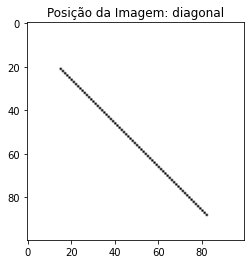

In [4]:
# Imagem Inclinada
img = cv2.imread("inclinada.bmp", 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#Exibindo o resultado do método print_line_type no título da imagem
plt.title("Posição da Imagem: " + print_line_type(img))
plt.show()
plt.close()

2 - Faça um programa que leia uma imagem e imprima a quantidade de objetos distintos presentes
na imagem. Os objetos têm formas variadas, mas todos seus pixels têm a mesma cor. O
programa não pode ter intervenção humana, isto é, o reconhecimento deve ser automático. O
fundo da imagem sempre é branco.

In [5]:
'''
Função recursiva que abastece um dictionary com todos os pontos que fazem parte do objeto
'''
def find_object(seed, image_matrix, object_list):    
    background_color = 255 # definiing background as white
    line_ini = seed[0] - 1
    line_end = line_ini + 3

    col_ini = seed[1] - 1
    col_end = col_ini + 3
    object_list[seed] = True
    for line in range(line_ini, line_end):
        for column in range(col_ini, col_end):            
            if column != seed[1] or line != seed[0]:# condition to ignore the central point
                if (line, column) not in object_list.keys():
                    if image_matrix[line][column] < background_color:
                        find_object((line, column), image_matrix, object_list)

    return object_list

'''
Função para encontrar as sementes, chamar a função recursiva e em seguida limpar o objeto 
da imagem original.
'''
def get_object_qty(image_matrix, background_color):
    has_object = True
    qty = 0
    # run while has objects
    while has_object == True:
        has_object = False
        obj = {}
        for line in range(len(image_matrix)):
            for column in range(len(image_matrix[0])):
                if image_matrix[line][column] < background_color:
                    has_object = True
                    obj1 = find_object((line, column), image_matrix, obj)
                    qty += 1 # counting objects
                    # cleaning th object painting with background color
                    for i in obj1.keys():
                        image_matrix[i[0]][i[1]] = background_color
    #print(qty, "objetos")
    return qty

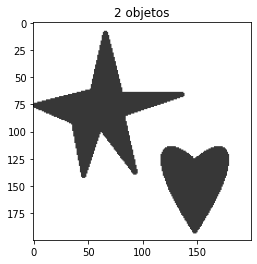

In [6]:
sys.setrecursionlimit(5000)

img2 = cv2.imread("2objetos.bmp", 0)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
qtd = get_object_qty(img2, 255) #chamando o método de contagem de objetos
plt.title(str(qtd) + " objetos") # exibindo a contagem de objetos
plt.show()



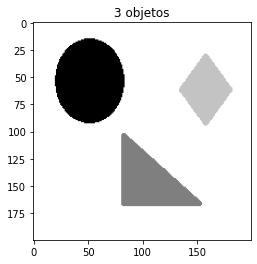

In [7]:
sys.setrecursionlimit(5000)

# Imagem Original
img2 = cv2.imread("3objetos.bmp", 0)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
qtd = get_object_qty(img2, 255) #chamando o método de contagem de objetos
plt.title(str(qtd) + " objetos") # exibindo a contagem de objetos
plt.show()


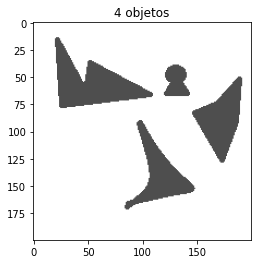

In [8]:
sys.setrecursionlimit(5000)

# Imagem Original
img2 = cv2.imread("4objetos.bmp", 0)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
qtd = get_object_qty(img2, 255) #chamando o método de contagem de objetos
plt.title(str(qtd) + " objetos") # exibindo a contagem de objetos
plt.show()

3 - Faça um programa que identifique as bordas em uma imagem e faça “emendas” usando o
conceito de gradiente visto em aula. O programa deve:

a) fazer pré-processamentos usando técnicas de realce e/ou suavização vistos na aula de PI
anterior.

In [9]:
def equalization(image_matrix):
    # aplying equalization (a item)
    lines = len(image_matrix)
    columns = len(image_matrix[0])
    max_contrast_resolution = 256
    # creates a vector with a position for each frequency of gray level
    frequency_gray_levels = [0 for x in range(max_contrast_resolution)]
    # Run each pixel of the image matrix to get each frequency
    for line in range(lines):
        for column in range(columns):
            pixel_gray_level = image_matrix[line, column]
            frequency_gray_levels[pixel_gray_level] += 1

    cumulative_value = 0
    # creates a vector with a position for each cumulative frequency of a gray level
    cumulative_frequency_gray_levels = [0 for x in range(max_contrast_resolution)]
    gray_level = 0
    # run each frequency to determine the cumulative frequency
    for gray_level in range(max_contrast_resolution):
        cumulative_value += frequency_gray_levels[gray_level]
        cumulative_frequency_gray_levels[gray_level] = cumulative_value

    # in class slide, the I
    ideal_pixels_number = lines * columns / max_contrast_resolution

    # create a dictionary for each gray level with the equalization value
    equalization_values = {}

    for gray_level in range(max_contrast_resolution):
        cumulative_frequency = cumulative_frequency_gray_levels[gray_level]
        equalization_value = max(0, (round((cumulative_frequency / ideal_pixels_number)) - 1))
        equalization_values[gray_level] = equalization_value

    # apply the equalization to each images pixel
    for line in range(lines):
        for column in range(columns):
            image_matrix[line, column] = equalization_values[image_matrix[line, column]]
            
    return image_matrix


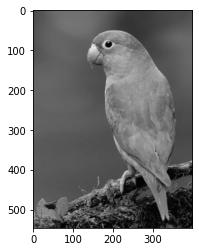

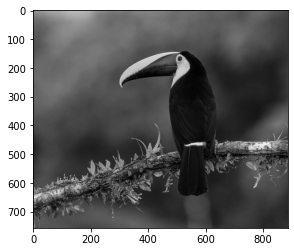

In [10]:
#IMAGENS ORIGINAIS

# Imagem Teste 1 Original
img1 = cv2.imread("bird_parakeet.jpg", 0)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255, )
plt.show()

# Imagem Teste 2 Original
img2 = cv2.imread("bird_toucan.jpg", 0)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255, )
plt.show()



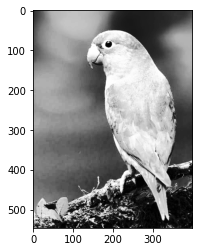

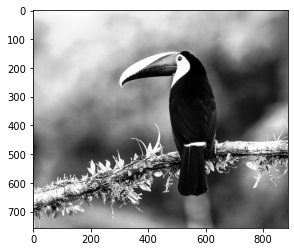

In [11]:
#IMAGENS EQUALIZADAS

img1_eq = equalization(img1)
# Imagem Teste 1 Equalizada
plt.imshow(img1_eq, cmap='gray', vmin=0, vmax=255, )
plt.show()

img2_eq = equalization(img2)
# Imagem Teste 2 Equalizada
plt.imshow(img2_eq, cmap='gray', vmin=0, vmax=255, )
plt.show()

b) utilizar qualquer uma das técnicas de detecção de bordas vistas em aula. O resultado deste
passo deve ser uma imagem binária.

In [12]:

def edge_detection(image_matrix, limiar):
    # aplying edge detection (b item)

    line_ini = 0
    line_end = len(image_matrix) - 1

    col_ini = 0
    col_end = len(image_matrix[0]) - 1

    for line in range(line_ini, line_end):
        for column in range(col_ini, col_end):
            # calculating gradient
            grad = abs(
                int(image_matrix[line][column]) - int(image_matrix[line][column + 1])
            ) + abs(
                int(image_matrix[line][column]) - int(image_matrix[line + 1][column])
            )
            
            # using limiar to make the image binary
            if grad < limiar:
                bin_color = 0
            else:
                bin_color = 255
            image_matrix[line][column] = bin_color
    return image_matrix

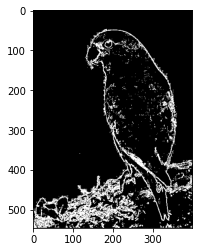

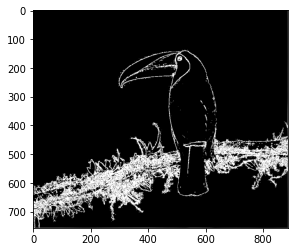

In [13]:
img1_edge = edge_detection(img1_eq, 30)
# Imagem Teste 1 Bordas
plt.imshow(img1_edge, cmap='gray', vmin=0, vmax=255, )
plt.show()

img2_edge = edge_detection(img2_eq, 30)
# Imagem Teste 2 Bordas
plt.imshow(img2_edge, cmap='gray', vmin=0, vmax=255, )
plt.show()

c) emendar as bordas usando o conceito de gradiente
Além do programa, você deve entregar dois exemplos de processamento de imagens reais,
mostrando a imagem original e a imagem resultante após cada fase de processamento.

In [14]:
def edge_link(image_matrix, alpha_treshold):    
    
    line_ini = 0
    line_end = len(image_matrix) - 2

    col_ini = 0
    col_end = len(image_matrix[0]) - 2

    # linking edges by gradient (c item)

    for line in range(line_ini, line_end):
        for column in range(col_ini, col_end):
            # getting 2 points of gradient
            grad1 = abs(
                int(image_matrix[line][column]) - int(image_matrix[line][column + 1])
            ) + abs(
                int(image_matrix[line][column]) - int(image_matrix[line + 1][column])
            )
            grad2 = abs(
                int(image_matrix[line][column+1]) - int(image_matrix[line][column + 2])
            ) + abs(
                int(image_matrix[line+1][column+1]) - int(image_matrix[line + 2][column+1])
            )
            #tan^1 of each gradient
            alpha1 = math.atan(grad1)
            alpha2 = math.atan(grad2)

            if abs(alpha1 - alpha2) < alpha_treshold:
                image_matrix[line][column] = 0
            else:
                image_matrix[line][column] = 255
        return image_matrix

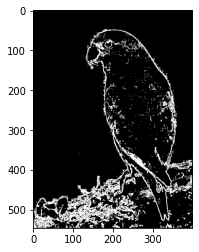

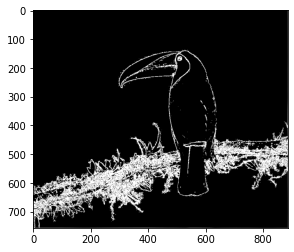

In [15]:
img1_link = edge_link(img1_edge, 0.5)
# Imagem Teste 1 Bordas Ligadas
plt.imshow(img1_edge, cmap='gray', vmin=0, vmax=255, )
plt.show()

img2_link = edge_link(img2_edge, 0.5)
# Imagem Teste 2 Bordas Ligadas
plt.imshow(img2_edge, cmap='gray', vmin=0, vmax=255, )
plt.show()